In [1]:
import xspec
import batanalysis as ba
from swifttools.swift_too import GUANO, ObsQuery, Clock
import swiftbat

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from pathlib import Path
from astropy.io import fits
from astropy.time import Time, TimeDelta
import astropy.units as u
from astropy.coordinates import SkyCoord
import datetime
import os

In [2]:
tmp_download_dir="/tmp/batdata/download_examples"

ba.datadir(tmp_download_dir, mkdir=True)


PosixPath('/private/tmp/batdata/download_examples')

In [3]:
query = ObsQuery(targetid=147478)
query

2005-07-24 12:34:18,2005-07-24 13:13:12,GRB050724,00147478000,2270,64
2005-07-24 14:04:29,2005-07-24 14:49:29,GRB050724,00147478000,2561,139
2005-07-24 15:40:54,2005-07-24 16:25:54,GRB050724,00147478000,2561,139
2005-07-24 17:17:19,2005-07-24 18:02:19,GRB050724,00147478000,2572,128
2005-07-24 18:53:45,2005-07-24 19:38:45,GRB050724,00147478000,2573,127
2005-07-24 20:31:03,2005-07-24 21:15:20,GRB050724,00147478000,2530,127
2005-07-24 22:06:36,2005-07-24 22:51:36,GRB050724,00147478000,2583,117
2005-07-24 23:43:02,2005-07-25 00:28:02,GRB050724,00147478000,2583,117
2005-07-25 01:19:27,2005-07-25 02:04:27,GRB050724,00147478000,2636,64
2005-07-25 02:55:53,2005-07-25 03:40:53,GRB050724,00147478000,2636,64
2005-07-25 04:32:19,2005-07-25 05:17:19,GRB050724,00147478000,2636,64


In [4]:
query = ObsQuery(name="GRB050724")
query

2005-07-24 12:34:18,2005-07-24 13:13:12,GRB050724,00147478000,2270,64
2005-07-24 14:04:29,2005-07-24 14:49:29,GRB050724,00147478000,2561,139
2005-07-24 15:40:54,2005-07-24 16:25:54,GRB050724,00147478000,2561,139
2005-07-24 17:17:19,2005-07-24 18:02:19,GRB050724,00147478000,2572,128
2005-07-24 18:53:45,2005-07-24 19:38:45,GRB050724,00147478000,2573,127
2005-07-24 20:31:03,2005-07-24 21:15:20,GRB050724,00147478000,2530,127
2005-07-24 22:06:36,2005-07-24 22:51:36,GRB050724,00147478000,2583,117
2005-07-24 23:43:02,2005-07-25 00:28:02,GRB050724,00147478000,2583,117
2005-07-25 01:19:27,2005-07-25 02:04:27,GRB050724,00147478000,2636,64
2005-07-25 02:55:53,2005-07-25 03:40:53,GRB050724,00147478000,2636,64
2005-07-25 04:32:19,2005-07-25 05:17:19,GRB050724,00147478000,2636,64


In [5]:
download = ba.download_swiftdata(observations=query[0].obsid)
print(download)

{'00147478000': {'obsid': '00147478000', 'success': True, 'obsoutdir': PosixPath('/private/tmp/batdata/download_examples/00147478000'), 'quicklook': False, 'data': Swift_Data(username='anonymous',obsid='00147478000',quicklook='False',auxil='True',bat='True',xrt='False',uvot='False',log='False',tdrss='True')}}


/Users/tparsota/opt/anaconda3/envs/py311/lib/python3.11/site-packages/swifttools/swift_too/swift_data.py:405: UserWarning: SWIFT_TLE_ARCHIVE.txt.14335.67560079.gz exists and not overwritten (set clobber=True to override this).
/Users/tparsota/opt/anaconda3/envs/py311/lib/python3.11/site-packages/swifttools/swift_too/swift_data.py:405: UserWarning: sw00147478000pat.fits.gz exists and not overwritten (set clobber=True to override this).
/Users/tparsota/opt/anaconda3/envs/py311/lib/python3.11/site-packages/swifttools/swift_too/swift_data.py:405: UserWarning: sw00147478000pjb.par.gz exists and not overwritten (set clobber=True to override this).
/Users/tparsota/opt/anaconda3/envs/py311/lib/python3.11/site-packages/swifttools/swift_too/swift_data.py:405: UserWarning: sw00147478000pob.cat.gz exists and not overwritten (set clobber=True to override this).
/Users/tparsota/opt/anaconda3/envs/py311/lib/python3.11/site-packages/swifttools/swift_too/swift_data.py:405: UserWarning: sw00147478000ppr

In [6]:
event=ba.BatEvent(query[0].obsid)

A save file has been written to /private/tmp/batdata/download_examples/00147478000_eventresult/batevent.pickle.


(-1.0, 1.0)

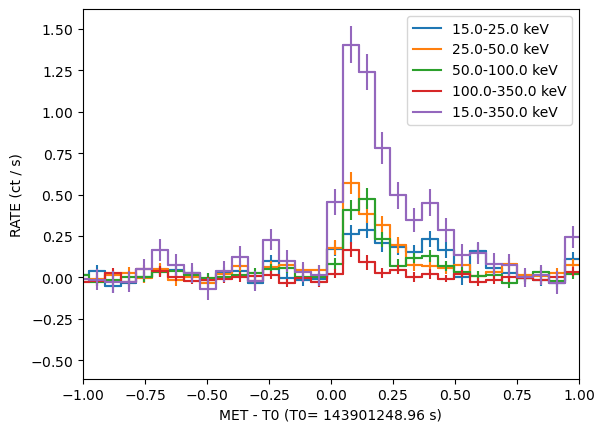

In [7]:
lc=event.create_lightcurve()
fig, ax =lc.plot(T0=event.trigtime_met, plot_relative=True)
ax.set_xlim([-1, 1])

In [8]:
lc.set_timebins(timebinalg="bayesian", save_durations=True)

In [9]:
print(f"The measured T90 is {lc.tdurs['T90']['TSTOP']-lc.tdurs['T90']['TSTART']}\nmeasured from {lc.tdurs['T90']['TSTART']-event.trigtime_met*u.s}-{lc.tdurs['T90']['TSTOP']-event.trigtime_met*u.s}" )
print(f"The measured {lc.tdurs['PEAK']['TSTOP']-lc.tdurs['PEAK']['TSTART']} peak is \nmeasured from {lc.tdurs['PEAK']['TSTART']-event.trigtime_met*u.s}-{lc.tdurs['PEAK']['TSTOP']-event.trigtime_met*u.s}" )
print(f"The measured T100 is {lc.tdurs['TOT']['TSTOP']-lc.tdurs['TOT']['TSTART']}\nmeasured from {lc.tdurs['TOT']['TSTART']-event.trigtime_met*u.s}-{lc.tdurs['TOT']['TSTOP']-event.trigtime_met*u.s}" )

The measured T90 is 99.26400002837181 s
measured from 0.04799997806549072 s-99.3120000064373 s
The measured 1.0 s peak is 
measured from -0.06799998879432678 s-0.9320000112056732 s
The measured T100 is 107.19999998807907 s
measured from -0.01600000262260437 s-107.18399998545647 s


{'T90': {'TSTART': <Quantity 1.43901249e+08 s>, 'TSTOP': <Quantity 1.43901348e+08 s>}, 'T50': {'TSTART': <Quantity 1.43901251e+08 s>, 'TSTOP': <Quantity 1.43901326e+08 s>}, 'PEAK': {'TSTART': <Quantity 1.43901249e+08 s>, 'TSTOP': <Quantity 1.4390125e+08 s>}, 'TOT': {'TSTART': <Quantity 1.43901249e+08 s>, 'TSTOP': <Quantity 1.43901356e+08 s>}, 'BKG1': {'TSTART': <Quantity -1.e+307 s>, 'TSTOP': <Quantity 1.43901249e+08 s>}, 'BKG2': {'TSTART': <Quantity 1.43901356e+08 s>, 'TSTOP': <Quantity 1.e+307 s>}}
{'TIME_CENT': <Quantity [1.43901099e+08, 1.43901249e+08, 1.43901249e+08, 1.43901249e+08,
           1.43901251e+08, 1.43901304e+08, 1.43901454e+08] s>, 'TIME_START': <Quantity [1.43900950e+08, 1.43901249e+08, 1.43901249e+08, 1.43901249e+08,
           1.43901249e+08, 1.43901252e+08, 1.43901356e+08] s>, 'TIME_STOP': <Quantity [1.43901249e+08, 1.43901249e+08, 1.43901249e+08, 1.43901249e+08,
           1.43901252e+08, 1.43901356e+08, 1.43901552e+08] s>}


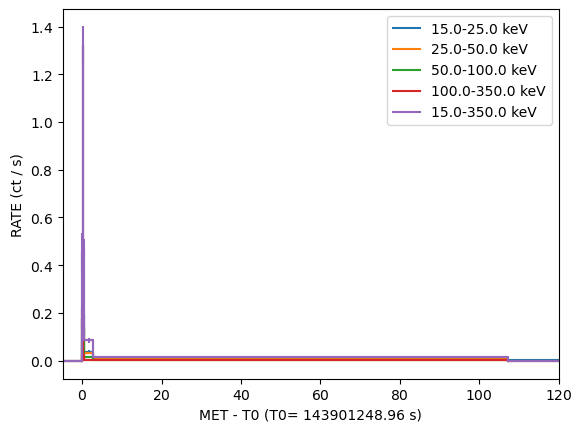

In [10]:
fig, ax = lc.plot(T0=event.trigtime_met, plot_relative=True)
ax.set_xlim([-5, +120])
print(lc.tdurs)
print(lc.tbins)

In [11]:
spectrum_t90=event.create_pha(tstart=lc.tdurs['T90']['TSTART'], tstop=lc.tdurs['T90']['TSTOP'])


1 spectrum  in use
 
Spectral Data File: t_143901249.008-143901348.272_80chan.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.080e-02 +/- 2.110e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-80
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 99.26 sec
 Using fit statistic: chi
 Using Response (RMF) File            t_143901249.008-143901348.272_80chan.rsp for Source 1


Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared      

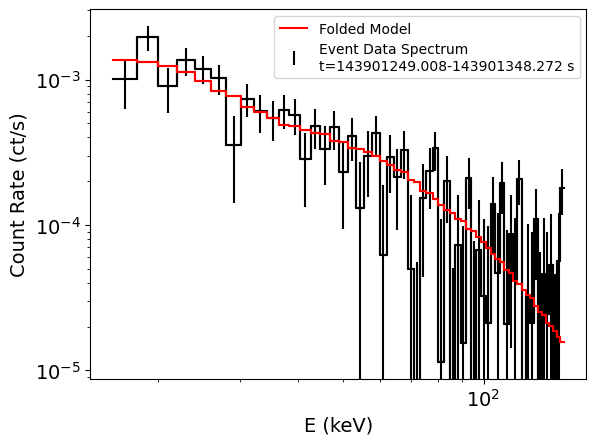

In [12]:
ba.fit_spectrum(spectrum_t90)

In [13]:
spectrum_t90.spectral_model

{'parameters': {'Emin': {'val': 15.0,
   'lolim': 0.0,
   'hilim': 0.0,
   'errflag': 'FFFFFTFFF'},
  'Emax': {'val': 150.0, 'lolim': 0.0, 'hilim': 0.0, 'errflag': 'FFFFFTFFF'},
  'lg10Flux': {'val': -8.007266196967619,
   'lolim': -8.7285754501563,
   'hilim': -7.429853863388389,
   'errflag': 'FFFFFFFFF'},
  'PhoIndex': {'val': 1.750545606362729,
   'lolim': -0.5382617991590737,
   'hilim': 4.317071040790413,
   'errflag': 'FFFFFFFFF'},
  'norm': {'val': 0.001, 'lolim': 0.0, 'hilim': 0.0, 'errflag': 'FFFFFTFFF'}},
 'data': {'model_spectrum': <Quantity [1.36575612e-03, 1.31072299e-03, 1.23782004e-03, 1.12947699e-03,
             9.83720493e-04, 8.35807404e-04, 7.74337648e-04, 6.51264082e-04,
             6.01292612e-04, 5.45516015e-04, 4.85896857e-04, 4.78742573e-04,
             4.48010438e-04, 4.25913225e-04, 4.21536802e-04, 3.77822018e-04,
             3.74201082e-04, 3.36773921e-04, 3.34533071e-04, 3.15532834e-04,
             2.97052404e-04, 2.75852168e-04, 2.57063895e-04, 2.3858

In [14]:
bayesian_spectra=event.create_pha(tstart=lc.tbins["TIME_START"], tstop=lc.tbins["TIME_STOP"])
output_bayesian_spectra=ba.parallel.batspectrum_analysis(bayesian_spectra, nprocs=1, use_cstat=False)

ValueError: Both tstart and tstop must have the same length.

In [ ]:
%debug


> /Users/tparsota/Library/CloudStorage/Box-Box/BatAnalysis/batanalysis/bat_tte.py(964)create_pha()
    962                 input_tstop = u.Quantity([input_tstop])
    963             else:
--> 964                 raise ValueError("Both tstart and tstop must have the same length.")
    965 
    966         if energybins is None:

ipdb> input_tstart
<Quantity [1.43900950e+08, 1.43901249e+08, 1.43901249e+08, 1.43901249e+08,
           1.43901249e+08, 1.43901252e+08, 1.43901356e+08] s>
ipdb> input_tstop
<Quantity [1.43901249e+08, 1.43901249e+08, 1.43901249e+08, 1.43901249e+08,
           1.43901252e+08, 1.43901356e+08, 1.43901552e+08] s>


In [ ]:
#ba.plot_TTE_lightcurve(lc, [spectrum_t90], plot_relative=True, T0=event.trigtime_met)
fig, ax = ba.plot_TTE_lightcurve(lc, output_bayesian_spectra, plot_relative=True, T0=event.trigtime_met)


In [ ]:
lc_1s=event.create_lightcurve(timebinalg="uniform", timedelta=np.timedelta64(1, "s"))#, tstart=-1*u.s, tstop=1*u.s, is_relative=True, T0=event.trigtime_met)
fig, ax =lc_1s.plot(T0=event.trigtime_met, plot_relative=True)

In [ ]:
lc_1s.set_timebins(tmin=-10*u.s, tmax=150*u.s, timedelta=np.timedelta64(1, "s"), is_relative=True, T0=event.trigtime_met)
fig, ax =lc_1s.plot(energybins=[15,350]*u.keV, T0=event.trigtime_met, plot_relative=True)
ax.axhline(0, c='k', ls='--')

ax.axvspan((lc.tdurs['T90']['TSTART']-event.trigtime_met*u.s).value, (lc.tdurs['T90']['TSTOP']-event.trigtime_met*u.s).value, color='g', alpha=0.3, label="T90")
ax.legend()


In [ ]:
spectrum_peak_1s=event.create_pha(tstart=lc.tdurs['PEAK']['TSTART'], tstop=lc.tdurs['PEAK']['TSTOP'])
spectrum_peak_1s.plot()

In [ ]:
ba.fit_spectrum(spectrum_peak_1s, use_cstat=False)

In [ ]:
peak_flux = event.create_lightcurve(tstart=lc.tdurs['PEAK']['TSTART'],tstop=lc.tdurs['PEAK']['TSTOP'], timedelta=np.timedelta64(0, "s"))
print(peak_flux.data["RATE"]*(lc.tdurs['PEAK']['TSTOP']-lc.tdurs['PEAK']['TSTART']))


In [ ]:
spectrum_peak_tot=event.create_pha(tstart=lc.tdurs['TOT']['TSTART'], tstop=lc.tdurs['TOT']['TSTOP'])
ba.fit_spectrum(spectrum_peak_tot, use_cstat=False)


In [ ]:
total_fluence = event.create_lightcurve(tstart=lc.tdurs['TOT']['TSTART'], tstop=lc.tdurs['TOT']['TSTOP'], timedelta=np.timedelta64(0, "s"))
print(total_fluence.data["RATE"]*(lc.tdurs['TOT']['TSTOP']-lc.tdurs['TOT']['TSTART']))

In [ ]:
ba.fit_spectrum(spectrum_peak_tot, use_cstat=False, generic_model="cflux*grbm", setPars={1:"15,-1", 2:"150,-1",3:-8, 4:"-2",5:"-2",6:100, 7:"1e-3,-1"}, fit_iterations=10000)

In [ ]:
ba.fit_TTE_spectrum?

In [ ]:
xspec.Model("cflux*grbm", )